In [1]:
import torch
import numpy as np
import pandas as pd
import random
import torch.nn.functional as F
from torch import nn

In [2]:
from models import *
from utility import *

In [3]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

# Prva naloga

In [4]:
data = pd.read_csv("okuzeni.csv")
data = data.fillna(0)
data = data / data.max()
data

,braslovče,celje,dobje,dobrna,gornji_grad,kozje,laško,ljubno,luče,mozirje,...,radlje_ob_dravi,ravne_na_koroškem,ribnica_na_pohorju,slovenj_gradec,vuzenica,črna_na_koroškem,hrastnik,litija,trbovlje,zagorje_ob_savi
0,0.072900,0.096673,0.097345,0.143939,0.257642,0.046243,0.057719,0.140845,0.118056,0.147420,...,0.176271,0.078720,0.093023,0.103627,0.107872,0.113793,0.087613,0.079287,0.056893,0.097132
1,0.079239,0.085510,0.044248,0.121212,0.279476,0.043353,0.052851,0.117371,0.125000,0.142506,...,0.176271,0.074394,0.100775,0.099482,0.104956,0.117241,0.104230,0.084204,0.058352,0.092568
2,0.085578,0.084394,0.053097,0.117424,0.262009,0.040462,0.055633,0.075117,0.111111,0.147420,...,0.169492,0.072664,0.093023,0.102591,0.104956,0.106897,0.131420,0.075599,0.073669,0.096480
3,0.080824,0.082384,0.053097,0.102273,0.240175,0.040462,0.054937,0.065728,0.104167,0.130221,...,0.164407,0.067474,0.093023,0.099482,0.102041,0.106897,0.129909,0.079902,0.070022,0.087353
4,0.082409,0.081491,0.061947,0.102273,0.235808,0.040462,0.057719,0.061033,0.090278,0.125307,...,0.169492,0.064014,0.085271,0.097409,0.099125,0.093103,0.134441,0.078058,0.083880,0.103651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.025357,0.030587,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,...,0.038983,0.039792,0.031008,0.027979,0.043732,0.017241,0.113293,0.069453,0.036470,0.065841
796,0.025357,0.029917,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,...,0.038983,0.040657,0.031008,0.027979,0.037901,0.017241,0.113293,0.065765,0.035740,0.062581
797,0.023772,0.029917,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,...,0.032203,0.039792,0.031008,0.027979,0.037901,0.017241,0.113293,0.065765,0.035740,0.061278
798,0.026941,0.028801,0.061947,0.026515,0.034934,0.017341,0.027121,0.009390,0.020833,0.024570,...,0.030508,0.041522,0.023256,0.025389,0.037901,0.017241,0.119335,0.071911,0.040846,0.065841


RNN celica

In [5]:
obcine = ["ljubljana", "maribor", "kranj", "koper", "celje", "novo_mesto", "velenje", "nova_gorica", "krško", "ptuj", "murska_sobota", "slovenj_gradec"]
test_data = data[obcine]
data = data.drop(obcine, axis=1)

In [6]:
data

,braslovče,dobje,dobrna,gornji_grad,kozje,laško,ljubno,luče,mozirje,nazarje,...,prevalje,radlje_ob_dravi,ravne_na_koroškem,ribnica_na_pohorju,vuzenica,črna_na_koroškem,hrastnik,litija,trbovlje,zagorje_ob_savi
0,0.072900,0.097345,0.143939,0.257642,0.046243,0.057719,0.140845,0.118056,0.147420,0.082969,...,0.094771,0.176271,0.078720,0.093023,0.107872,0.113793,0.087613,0.079287,0.056893,0.097132
1,0.079239,0.044248,0.121212,0.279476,0.043353,0.052851,0.117371,0.125000,0.142506,0.091703,...,0.091503,0.176271,0.074394,0.100775,0.104956,0.117241,0.104230,0.084204,0.058352,0.092568
2,0.085578,0.053097,0.117424,0.262009,0.040462,0.055633,0.075117,0.111111,0.147420,0.091703,...,0.083333,0.169492,0.072664,0.093023,0.104956,0.106897,0.131420,0.075599,0.073669,0.096480
3,0.080824,0.053097,0.102273,0.240175,0.040462,0.054937,0.065728,0.104167,0.130221,0.096070,...,0.078431,0.164407,0.067474,0.093023,0.102041,0.106897,0.129909,0.079902,0.070022,0.087353
4,0.082409,0.061947,0.102273,0.235808,0.040462,0.057719,0.061033,0.090278,0.125307,0.109170,...,0.083333,0.169492,0.064014,0.085271,0.099125,0.093103,0.134441,0.078058,0.083880,0.103651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.025357,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,0.052402,...,0.032680,0.038983,0.039792,0.031008,0.043732,0.017241,0.113293,0.069453,0.036470,0.065841
796,0.025357,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,0.048035,...,0.034314,0.038983,0.040657,0.031008,0.037901,0.017241,0.113293,0.065765,0.035740,0.062581
797,0.023772,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,0.048035,...,0.034314,0.032203,0.039792,0.031008,0.037901,0.017241,0.113293,0.065765,0.035740,0.061278
798,0.026941,0.061947,0.026515,0.034934,0.017341,0.027121,0.009390,0.020833,0.024570,0.048035,...,0.029412,0.030508,0.041522,0.023256,0.037901,0.017241,0.119335,0.071911,0.040846,0.065841


In [7]:
X = torch.tensor(data.to_numpy()).float()
cities_count = int(X.shape[1])
datapoints = int(X.shape[0])

Xtest = torch.tensor(test_data.to_numpy()).float()
cities_count_test = int(Xtest.shape[1])

def rangen(n, layers=5):
    return range(800-layers-n+1)

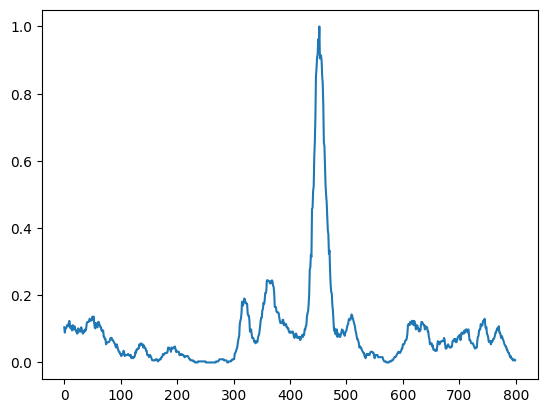

In [8]:
import matplotlib.pyplot as plt
plt.plot(X[:, 80])

In [9]:
n = 5
batch_size = 16
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

dset = create_dataset(X, batch_size, n)
modelrnn = recurrent(1, 1, 20, n)
criterion = torch.nn.L1Loss()
optimiser = torch.optim.AdamW(modelrnn.parameters(), lr=0.002, weight_decay=0.005)
epochs = 3

modelrnn = train_recurrent(modelrnn, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0513, est rea [0.145 0.063]
 Loss: 0.0814, est rea [0.098 0.014]
 Loss: 0.0144, est rea [0.022 0.000]
 Loss: 0.0778, est rea [0.100 0.031]
 Loss: 0.1060, est rea [0.125 0.000]
 Loss: 0.4648, est rea [0.402 0.759]
 Loss: 0.0321, est rea [0.056 0.042]
 Loss: 0.0202, est rea [0.066 0.113]
 Loss: 0.0388, est rea [0.226 0.252]
 Loss: 0.0074, est rea [0.028 0.033]
 Loss: 0.0416, est rea [0.047 0.075]
 Loss: 0.0156, est rea [0.016 0.000]
 Loss: 0.0228, est rea [0.116 0.077]
 Loss: 0.0215, est rea [0.077 0.098]
 Loss: 0.0163, est rea [0.058 0.038]
 Loss: 0.0184, est rea [0.044 0.025]
 Loss: 0.0314, est rea [0.113 0.079]
 Loss: 0.0703, est rea [0.253 0.215]
 Loss: 0.0235, est rea [0.074 0.092]
 Loss: 0.0088, est rea [0.016 0.020]
 Loss: 0.0108, est rea [0.062 0.044]
 Loss: 0.0073, est rea [0.020 0.026]
 Loss: 0.0145, est rea [0.092 0.107]
 Loss: 0.0204, est rea [0.085 0.113]
 Loss: 0.0094, est rea [0.038 0.044]
 Loss: 0.0144, est rea [0.162 0.145]
 Loss: 0.0052, est rea [0.108

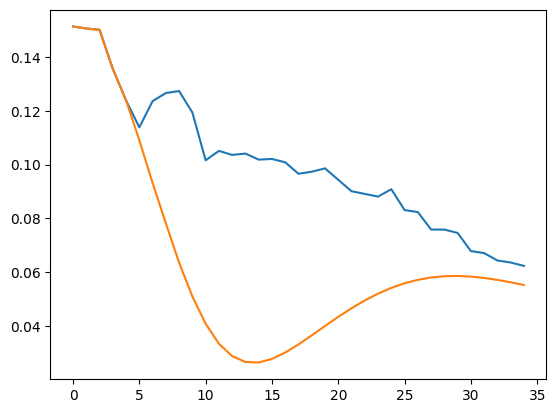

In [10]:
modelrnn.eval()
start = 61
n = 30
mine = predict_n(Xtest, 5, start, modelrnn, n)
plt.plot(Xtest[start:start+n+modelrnn.layers, 5])
plt.plot(mine)

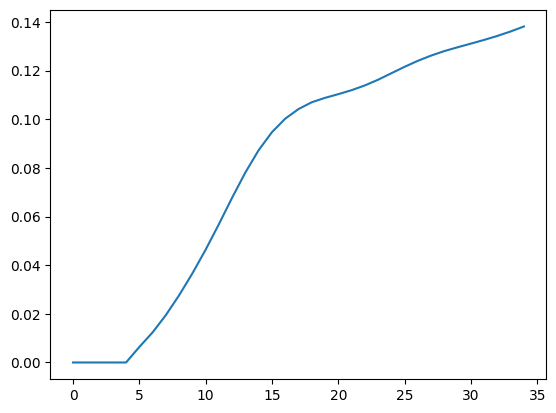

In [11]:
errors = compute_errors(Xtest, modelrnn, rangen(n), n)
plt.plot(errors)

In [12]:
print(errors[5:5+7].mean())
print(errors[5:].mean())

tensor(0.0294)
tensor(0.0942)


In [13]:
n = 7
best_real, best_mine, worst_real, worst_mine = compute_best_worst(Xtest, modelrnn, range(n), n)

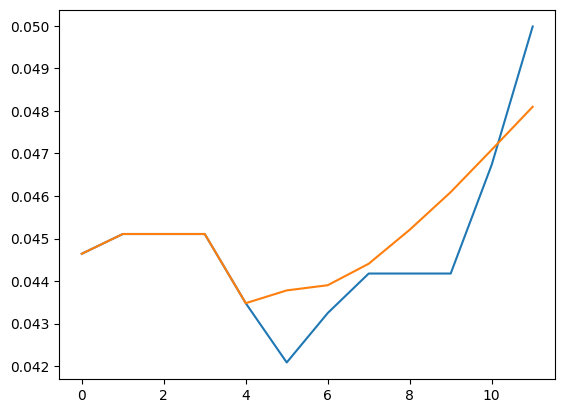

In [14]:
plt.plot(best_real)
plt.plot(best_mine)

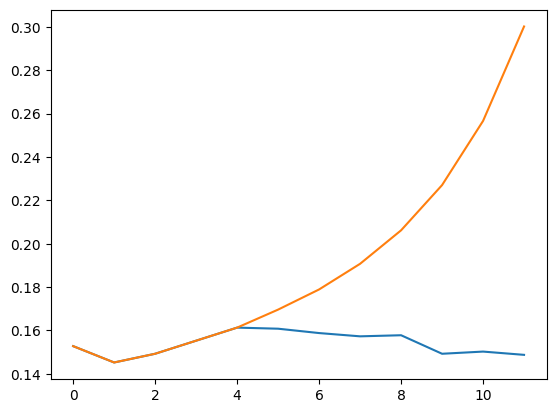

In [15]:
plt.plot(worst_real)
plt.plot(worst_mine)

In [16]:
n = 5
batch_size = 16
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
dset = create_dataset(X, batch_size, n)
modellstm = lstm(1, 1, 20, n)
criterion = torch.nn.L1Loss() #MSELoss()
optimiser = torch.optim.AdamW(modellstm.parameters(), lr=0.002, weight_decay=0.005)

modellstm =train_recurrent(modellstm, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.1685, est rea [-0.062 0.063]
 Loss: 0.1026, est rea [0.120 0.014]
 Loss: 0.0624, est rea [0.073 0.000]
 Loss: 0.0703, est rea [0.092 0.031]
 Loss: 0.0798, est rea [0.100 0.000]
 Loss: 0.5537, est rea [0.314 0.759]
 Loss: 0.0232, est rea [0.019 0.042]
 Loss: 0.0357, est rea [0.076 0.113]
 Loss: 0.0679, est rea [0.163 0.252]
 Loss: 0.0093, est rea [0.035 0.033]
 Loss: 0.0373, est rea [0.065 0.075]
 Loss: 0.0051, est rea [0.006 0.000]
 Loss: 0.0178, est rea [0.054 0.077]
 Loss: 0.0129, est rea [0.084 0.098]
 Loss: 0.0330, est rea [0.047 0.038]
 Loss: 0.0098, est rea [0.029 0.025]
 Loss: 0.0566, est rea [0.117 0.079]
 Loss: 0.0810, est rea [0.189 0.215]
 Loss: 0.0198, est rea [0.092 0.092]
 Loss: 0.0218, est rea [0.028 0.020]
 Loss: 0.0142, est rea [0.040 0.044]
 Loss: 0.0167, est rea [0.039 0.026]
 Loss: 0.0108, est rea [0.113 0.107]
 Loss: 0.0297, est rea [0.113 0.113]
 Loss: 0.0067, est rea [0.047 0.044]
 Loss: 0.0257, est rea [0.143 0.145]
 Loss: 0.0103, est rea [0.11

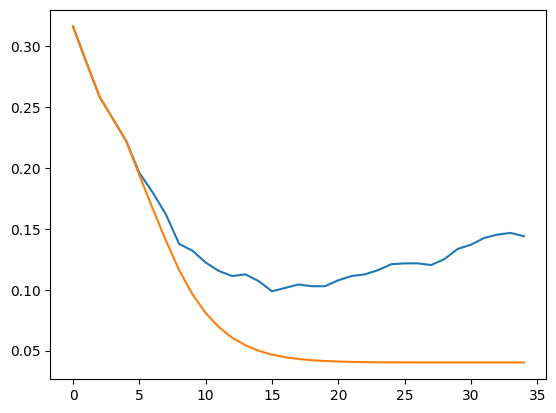

In [17]:
modellstm.eval()
start = 470
n = 30
mine = predict_n(X, 5, start, modellstm, n)
plt.plot(X[start:start+n+modellstm.layers, 5])
plt.plot(mine)

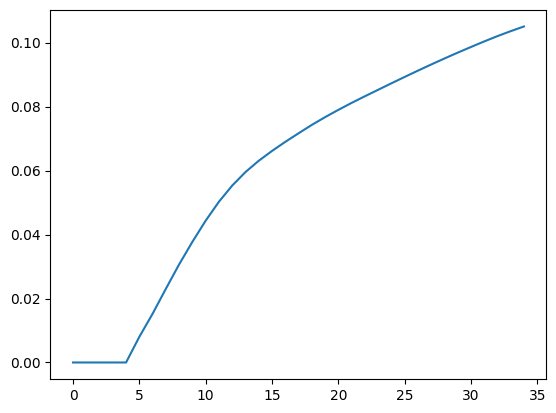

In [18]:
errors = compute_errors(Xtest, modellstm, rangen(n), n)
plt.plot(errors)

In [19]:
print(errors[5:5+7].mean())
print(errors[5:].mean())

tensor(0.0299)
tensor(0.0712)


In [20]:
n = 7
best_real, best_mine, worst_real, worst_mine = compute_best_worst(Xtest, modellstm, range(n), n)

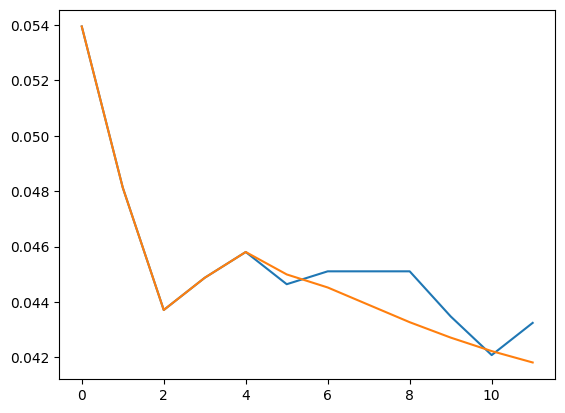

In [21]:
plt.plot(best_real)
plt.plot(best_mine)

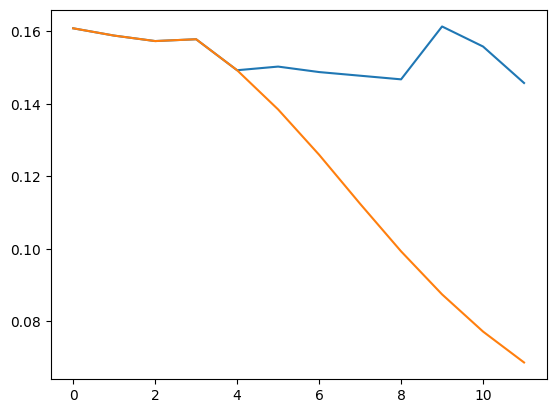

In [22]:
plt.plot(worst_real)
plt.plot(worst_mine)

modeli za N=10

In [23]:
n = 10
batch_size = 16
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
dset = create_dataset(X, batch_size, n)
modeldeep = deep_linear(1,20, n)
criterion = torch.nn.L1Loss() #MSELoss() 
optimiser = torch.optim.AdamW(modeldeep.parameters(), lr=0.002, weight_decay=0.005)

epochs = 3
modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0430, est rea [0.053 0.072]
 Loss: 0.0850, est rea [0.166 0.204]
 Loss: 0.0347, est rea [0.087 0.088]
 Loss: 0.0297, est rea [0.033 0.048]
 Loss: 0.0266, est rea [0.094 0.093]
 Loss: 0.0206, est rea [0.005 0.014]
 Loss: 0.0234, est rea [0.109 0.124]
 Loss: 0.0145, est rea [0.001 0.007]
 Loss: 0.0224, est rea [0.122 0.095]
 Loss: 0.0372, est rea [0.664 0.538]
 Loss: 0.0165, est rea [0.051 0.025]
 Loss: 0.1482, est rea [0.302 0.429]
 Loss: 0.1080, est rea [0.134 0.255]
 Loss: 0.0158, est rea [0.076 0.082]
 Loss: 0.0153, est rea [0.017 0.010]
 Loss: 0.0084, est rea [0.019 0.014]
 Loss: 0.0152, est rea [0.009 0.012]
 Loss: 0.0278, est rea [0.098 0.128]
 Loss: 0.0294, est rea [0.080 0.093]
 Loss: 0.0163, est rea [0.039 0.031]
 Loss: 0.0181, est rea [0.096 0.120]
 Loss: 0.0125, est rea [0.061 0.080]
 Loss: 0.0180, est rea [0.097 0.089]
 Loss: 0.0136, est rea [0.053 0.063]
 Loss: 0.0250, est rea [0.159 0.132]
 Loss: 0.0155, est rea [0.075 0.070]
 Loss: 0.0147, est rea [0.123

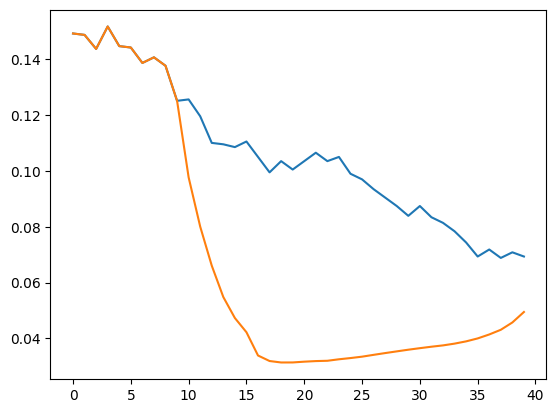

In [24]:
modeldeep.eval()
start = 60
n = 30
mine = predict_n_deep(Xtest, 10, start, modeldeep, n)
plt.plot(Xtest[start:start+n+modeldeep.layers, 10])
plt.plot(mine)

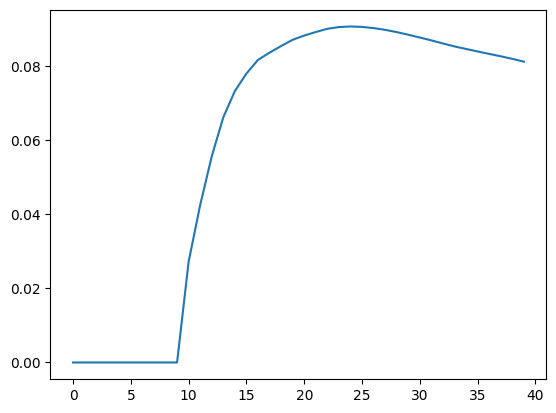

In [25]:
errors = compute_errors_deep(Xtest, modeldeep, rangen(n, 10), n)
plt.plot(errors)

In [26]:
print(errors[5:5+7].mean())
print(errors[5:].mean())

tensor(0.0100)
tensor(0.0691)


In [27]:
n = 7
best_real, best_mine, worst_real, worst_mine = compute_best_worst_deep(Xtest, modeldeep, range(n), n)

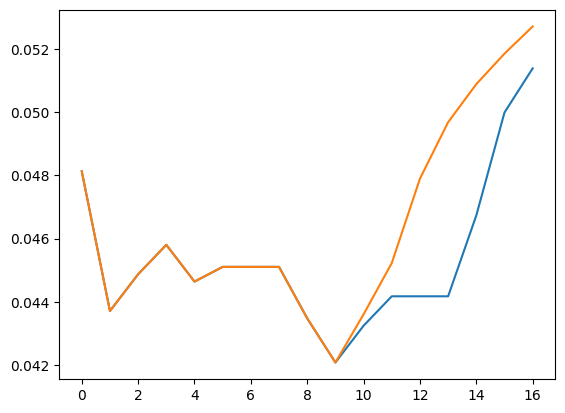

In [28]:
plt.plot(best_real)
plt.plot(best_mine)

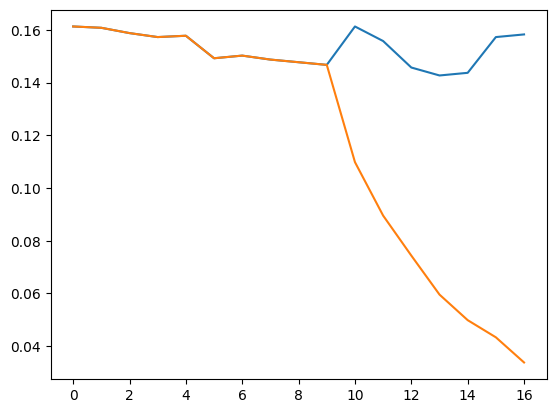

In [29]:
plt.plot(worst_real)
plt.plot(worst_mine)

In [30]:
n = 10
batch_size = 16
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
dset = create_dataset(X, batch_size, n)
modelrnn = recurrent(1, 1, 20, n)
criterion = torch.nn.L1Loss()
optimiser = torch.optim.AdamW(modelrnn.parameters(), lr=0.002, weight_decay=0.005)
#optimiser = torch.optim.SGD(modelrnn.parameters(), lr = 0.003, momentum=0.90)
epochs = 4

modelrnn = train_recurrent(modelrnn, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0241, est rea [0.075 0.072]
 Loss: 0.1335, est rea [0.083 0.204]
 Loss: 0.0252, est rea [0.053 0.088]
 Loss: 0.0155, est rea [0.068 0.048]
 Loss: 0.0214, est rea [0.096 0.093]
 Loss: 0.0784, est rea [0.098 0.014]
 Loss: 0.0291, est rea [0.091 0.124]
 Loss: 0.0517, est rea [0.101 0.007]
 Loss: 0.0333, est rea [0.078 0.095]
 Loss: 0.0825, est rea [0.143 0.538]
 Loss: 0.1027, est rea [0.116 0.025]
 Loss: 0.4194, est rea [0.075 0.429]
 Loss: 0.1249, est rea [0.132 0.255]
 Loss: 0.0374, est rea [0.097 0.082]
 Loss: 0.0710, est rea [0.093 0.010]
 Loss: 0.0077, est rea [0.025 0.014]
 Loss: 0.0351, est rea [0.034 0.012]
 Loss: 0.0543, est rea [0.101 0.128]
 Loss: 0.0589, est rea [0.117 0.093]
 Loss: 0.0640, est rea [0.103 0.031]
 Loss: 0.0221, est rea [0.108 0.120]
 Loss: 0.0216, est rea [0.102 0.080]
 Loss: 0.0339, est rea [0.030 0.089]
 Loss: 0.0327, est rea [0.024 0.063]
 Loss: 0.0365, est rea [0.167 0.132]
 Loss: 0.0324, est rea [0.064 0.070]
 Loss: 0.0325, est rea [0.126

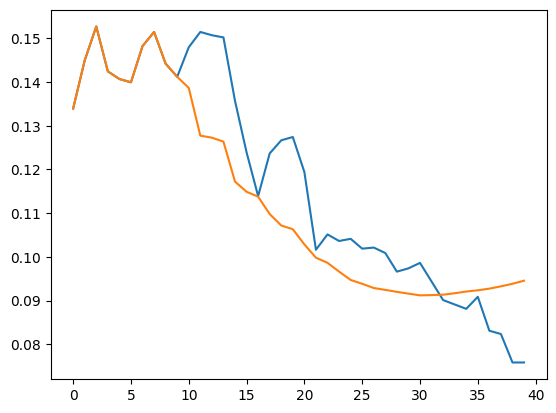

In [31]:
modelrnn.eval()
start = 50
n = 30
mine = predict_n(Xtest, 5, start, modelrnn, n)
plt.plot(Xtest[start:start+n+modelrnn.layers, 5])
plt.plot(mine)

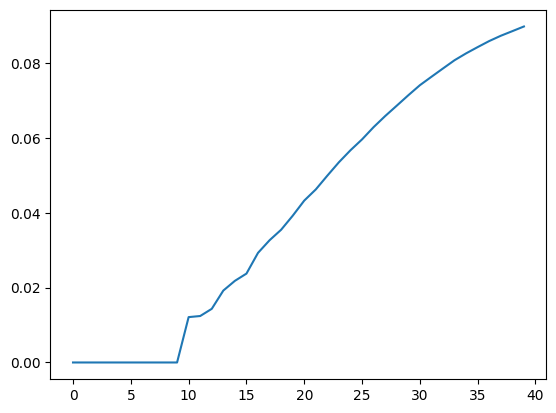

In [32]:
errors = compute_errors(Xtest, modelrnn, rangen(n, 10), n)
plt.plot(errors)

In [33]:
print(errors[5:5+7].mean())
print(errors[5:].mean())

tensor(0.0035)
tensor(0.0470)


In [34]:
n = 7
best_real, best_mine, worst_real, worst_mine = compute_best_worst(Xtest, modelrnn, range(n), n)

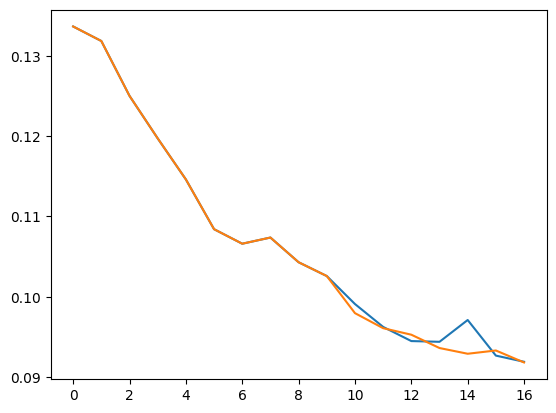

In [35]:
plt.plot(best_real)
plt.plot(best_mine)

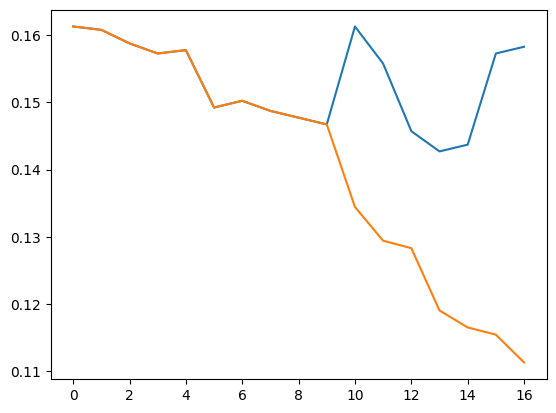

In [36]:
plt.plot(worst_real)
plt.plot(worst_mine)

In [37]:
n = 10
batch_size = 16
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
dset = create_dataset(X, batch_size, n)
modellstm = lstm(1, 1, 20, n)
criterion = torch.nn.L1Loss() #MSELoss()
optimiser = torch.optim.AdamW(modellstm.parameters(), lr=0.001, weight_decay=0.005)
epochs = 2
modellstm = train_recurrent(modellstm, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0246, est rea [0.068 0.072]
 Loss: 0.1408, est rea [0.076 0.204]
 Loss: 0.0244, est rea [0.054 0.088]
 Loss: 0.0151, est rea [0.054 0.048]
 Loss: 0.0220, est rea [0.105 0.093]
 Loss: 0.0497, est rea [0.069 0.014]
 Loss: 0.0443, est rea [0.070 0.124]
 Loss: 0.0362, est rea [0.076 0.007]
 Loss: 0.0411, est rea [0.067 0.095]
 Loss: 0.0808, est rea [0.074 0.538]
 Loss: 0.0636, est rea [0.078 0.025]
 Loss: 0.4386, est rea [0.058 0.429]
 Loss: 0.1901, est rea [0.067 0.255]
 Loss: 0.0269, est rea [0.069 0.082]
 Loss: 0.0643, est rea [0.085 0.010]
 Loss: 0.0398, est rea [0.065 0.014]
 Loss: 0.0248, est rea [0.057 0.012]
 Loss: 0.0886, est rea [0.066 0.128]
 Loss: 0.0613, est rea [0.094 0.093]
 Loss: 0.0392, est rea [0.075 0.031]
 Loss: 0.0431, est rea [0.078 0.120]
 Loss: 0.0211, est rea [0.099 0.080]
 Loss: 0.0302, est rea [0.014 0.089]
 Loss: 0.0173, est rea [0.038 0.063]
 Loss: 0.0421, est rea [0.224 0.132]
 Loss: 0.0214, est rea [0.095 0.070]
 Loss: 0.0369, est rea [0.099

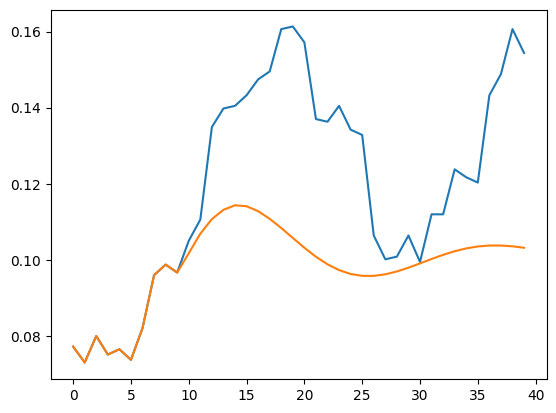

In [38]:
modellstm.eval()
start = 20
n = 30
mine = predict_n(X, 5, start, modellstm, n)
plt.plot(X[start:start+n+modellstm.layers, 5])
plt.plot(mine)

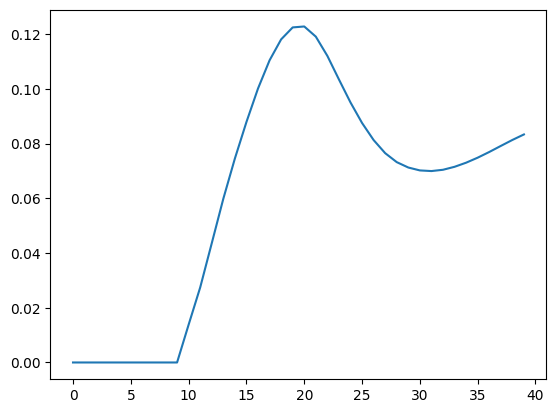

In [39]:
errors = compute_errors(Xtest, modellstm, rangen(n,10), n)
plt.plot(errors)

In [40]:
print(errors[5:5+7].mean())
print(errors[5:].mean())

tensor(0.0059)
tensor(0.0700)


In [41]:
n = 7
best_real, best_mine, worst_real, worst_mine = compute_best_worst(Xtest, modellstm, range(n), n)

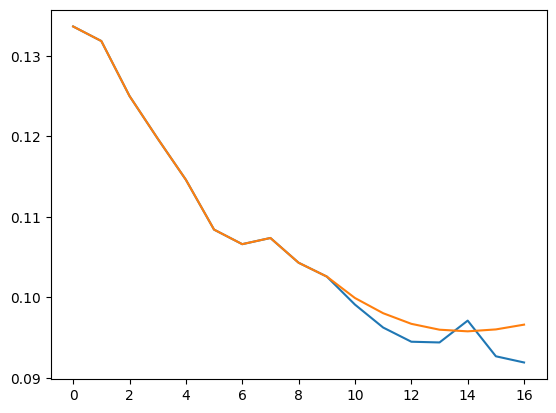

In [42]:
plt.plot(best_real)
plt.plot(best_mine)

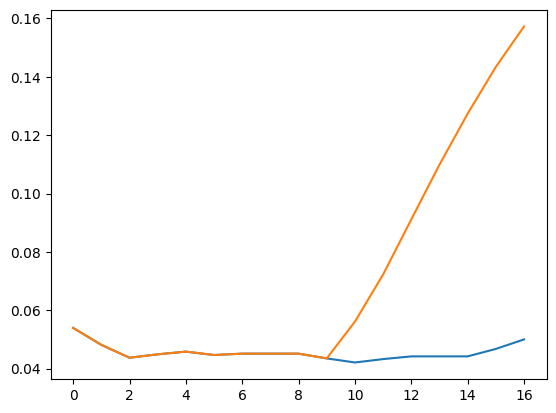

In [43]:
plt.plot(worst_real)
plt.plot(worst_mine)

# druga

In [44]:
from utility_geom import *

In [45]:
data2 = pd.read_csv("okuzeni.csv")
data2 = data2.fillna(0)
data2 = data2 / data2.max()

X = torch.tensor(data2.to_numpy()).float()
cities_count = int(X.shape[1])
datapoints = int(X.shape[0])

edge_index = txt_to_coo("sosedi.csv", data2)
edge_index = make_symmetric(edge_index)

test_ind = test_indices(data2)

In [46]:
n = 10
k = 3
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
dset = create_dataset_neigh_train(X, edge_index, k, n, test_ind)
modeldeep = deep_linear(1, 30, n*(k+1))
criterion = torch.nn.L1Loss() #MSELoss() 
optimiser = torch.optim.AdamW(modeldeep.parameters(), lr=0.002, weight_decay=0.005)

epochs = 3
modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0493, est rea [0.049 0.000]
 Loss: 0.3578, est rea [1.358 1.000]
 Loss: 0.0093, est rea [0.046 0.037]


/home/user/.local/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


 Loss: 0.4746, est rea [0.428 0.902]
 Loss: 0.0336, est rea [0.091 0.058]
 Loss: 0.2417, est rea [0.270 0.512]
 Loss: 0.0318, est rea [0.040 0.072]
 Loss: 0.0184, est rea [0.130 0.112]
 Loss: 0.0458, est rea [0.133 0.087]
 Loss: 0.0421, est rea [0.073 0.031]
 Loss: 0.0516, est rea [0.083 0.135]
 Loss: 0.0059, est rea [0.100 0.106]
 Loss: 0.0260, est rea [0.092 0.118]
 Loss: 0.0290, est rea [0.068 0.097]
 Loss: 0.0442, est rea [-0.039 0.006]
 Loss: 0.0122, est rea [0.104 0.117]
 Loss: 0.0133, est rea [-0.007 0.006]
 Loss: 0.0171, est rea [0.095 0.078]
 Loss: 0.0014, est rea [0.080 0.082]
 Loss: 0.0050, est rea [0.039 0.034]
 Loss: 0.0176, est rea [0.083 0.065]
 Loss: 0.0357, est rea [0.084 0.049]
 Loss: 0.0176, est rea [0.040 0.022]
 Loss: 0.0014, est rea [0.123 0.122]
 Loss: 0.0018, est rea [0.086 0.088]
 Loss: 0.0100, est rea [0.065 0.055]
 Loss: 0.0226, est rea [0.212 0.235]
 Loss: 0.0312, est rea [0.097 0.066]
 Loss: 0.0353, est rea [0.133 0.169]
 Loss: 0.0005, est rea [0.000 0.001]

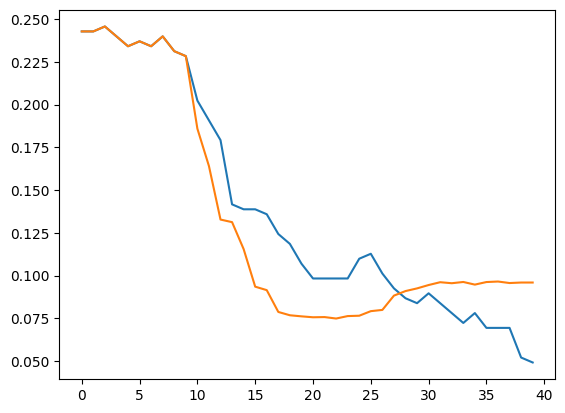

In [47]:
modeldeep.eval()
start = 60
predictions = 30
mine = predict_n_neigh(X, edge_index, 5, start, modeldeep, k, n, predictions)
plt.plot(X[start:start+predictions+n, 5])
plt.plot(mine)

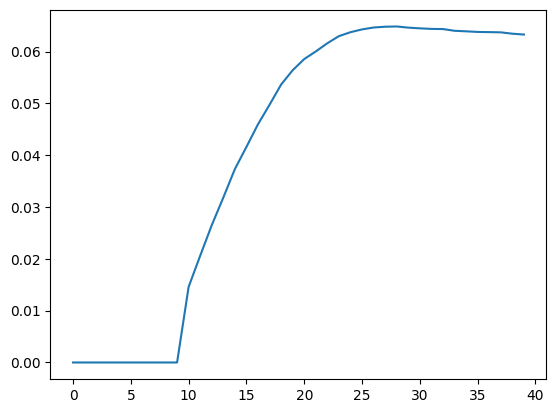

In [48]:

err = compute_errors_neigh(modeldeep, X, edge_index, k, n , predictions, test_ind)
plt.plot(err)

In [49]:
print(err[n:n+7].mean())
print(err[n:].mean())

tensor(0.0312)
tensor(0.0549)


In [50]:
n = 10
k = 5
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
dset = create_dataset_neigh_train_montedfs(X, edge_index, k, n, test_ind)
modeldeep = deep_linear(1, 30, n*(k+1))
criterion = torch.nn.L1Loss() #MSELoss() 
optimiser = torch.optim.AdamW(modeldeep.parameters(), lr=0.002, weight_decay=0.005)
epochs = 1

modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)
dset = create_dataset_neigh_train_montedfs(X, edge_index, k, n, test_ind)
modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)
dset = create_dataset_neigh_train_montedfs(X, edge_index, k, n, test_ind)
modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0176, est rea [0.102 0.085]
 Loss: 0.0483, est rea [-0.013 0.035]
 Loss: 0.0180, est rea [0.037 0.019]
 Loss: 0.0090, est rea [0.060 0.051]
 Loss: 0.0466, est rea [0.069 0.115]
 Loss: 0.0046, est rea [0.007 0.012]
 Loss: 0.0336, est rea [0.049 0.083]
 Loss: 0.0184, est rea [0.024 0.006]
 Loss: 0.0065, est rea [0.016 0.023]
 Loss: 0.0044, est rea [0.014 0.010]
 Loss: 0.0199, est rea [0.032 0.012]
 Loss: 0.0231, est rea [0.061 0.084]
 Loss: 0.0082, est rea [0.037 0.029]
 Loss: 0.0609, est rea [0.205 0.144]
 Loss: 0.0352, est rea [0.090 0.126]
 Loss: 0.0136, est rea [0.007 0.020]
 Loss: 0.0044, est rea [0.148 0.144]
 Loss: 0.0355, est rea [0.182 0.218]
 Loss: 0.0073, est rea [0.011 0.004]
 Loss: 0.0193, est rea [0.019 0.000]
 Loss: 0.0436, est rea [0.139 0.095]
 Loss: 0.0303, est rea [0.073 0.043]
 Loss: 0.0373, est rea [0.123 0.161]
 Loss: 0.0810, est rea [0.172 0.091]
 Loss: 0.0103, est rea [0.019 0.008]
 Loss: 0.0148, est rea [0.094 0.109]
 Loss: 0.0097, est rea [0.07

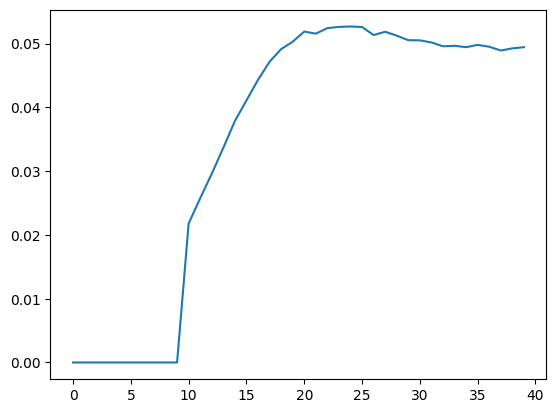

In [54]:
err = compute_errors_neigh_montedfs(modeldeep, X, edge_index, k, n , predictions, test_ind)
plt.plot(err)

In [55]:
print(err[n:n+7].mean())
print(err[n:].mean())

tensor(0.0334)
tensor(0.0465)


In [53]:
import importlib
importlib.reload(utility)
import utility_geom
importlib.reload(utility_geom)
from utility import *
from utility_geom import *